# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [47]:

%pip install tensorflowjs

^C
Note: you may need to restart the kernel to use updated packages.


In [48]:
tf.__version__

'2.11.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('DataSet/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 4,
                                                 class_mode = 'binary')

Found 45 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('DataSet/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 38 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
12/12 [==============================] - 3s 121ms/step - loss: 0.6975 - accuracy: 0.7111 - val_loss: 0.6120 - val_accuracy: 0.7105
Epoch 2/30
12/12 [==============================] - 1s 82ms/step - loss: 0.6074 - accuracy: 0.7556 - val_loss: 0.5667 - val_accuracy: 0.7105
Epoch 3/30
12/12 [==============================] - 1s 85ms/step - loss: 0.5414 - accuracy: 0.7556 - val_loss: 0.5274 - val_accuracy: 0.7105
Epoch 4/30
12/12 [==============================] - 1s 82ms/step - loss: 0.4992 - accuracy: 0.7556 - val_loss: 0.5277 - val_accuracy: 0.7105
Epoch 5/30
12/12 [==============================] - 1s 85ms/step - loss: 0.4129 - accuracy: 0.7556 - val_loss: 0.4504 - val_accuracy: 0.7105
Epoch 6/30
12/12 [==============================] - 1s 82ms/step - loss: 0.4138 - accuracy: 0.7111 - val_loss: 0.5124 - val_accuracy: 0.7368
Epoch 7/30
12/12 [==============================] - 1s 51ms/step - loss: 0.4843 - accuracy: 0.7556 - val_loss: 0.7033 - val_accuracy: 0.7105
Epoch 8/30
1

## Part 4 - Making a single prediction

In [22]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('DataSet\single_prediction\d17.jpeg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Valid Aadhar'
else:
  prediction = 'Not a Valid Aadhar'

1/1 [==============================] - 0s 35ms/step


In [61]:
tf.saved_model.save(cnn, "cnn")

INFO:tensorflow:Assets written to: cnn\assets


INFO:tensorflow:Assets written to: cnn\assets


In [77]:
# Convert the model
saved_model_dir = 'C:/Users/dbahe/Downloads/Women Techies - DL Auth/cnn'

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [23]:
print(prediction)

Not a Valid Aadhar


In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

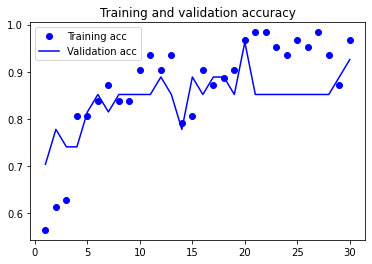

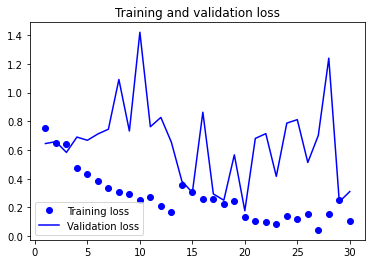

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()